**CSE-221710313026-K.LOKESH**

# **Finding Donars**

# **Aim**

In this machine learning project, I have collected the dataset from uci (https://archive.ics.uci.edu/ml/datasets/adult) and I will be using Machine Learning to find a donors

dataset: https://github.com/konerulokesh25/ai-ml/blob/master/donars.csv

# **Features**

1. age: Age 

2. workclass: Working Class (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked) 

3. education_level: Level of Education (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool) 

4. education-num: Number of educational years completed 

5. marital-status: Marital status (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse) 

6. occupation: Work Occupation (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces) 

7. relationship: Relationship Status (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried) 

8. race: Race (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black) 

9. sex: Sex (Female, Male) 

10. capital-gain: Monetary Capital Gains 

11. capital-loss: Monetary Capital Losses 

12. hours-per-week: Average Hours Per Week Worked 

13. native-country: Native Country (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands) 

# **Import libraries**

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

In [62]:
data = pd.read_csv ("/content/drive/My Drive/summer internship/project/summer internship/donars.csv",encoding="unicode_escape")
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**The dataset is now loaded into the variable dataset. I'll just take a glimpse of the data using the desribe() and info() methods before I actually start processing and visualizing it.**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**The scale of each feature column is different and quite varied as well. While the maximum for age reaches 90, the maximum of capital_gain is 99999**

In [7]:
data.drop(["fnlwgt"], axis = 1, inplace = True)
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**HANDLING MISSING VALUES AND DUPLICATE VALUES**

In [8]:
data.isnull()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
#no null values in the dataset
data.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [10]:
# no duplicated values in the dataset
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557     True
32558    False
32559     True
32560    False
Length: 32561, dtype: bool

In [11]:
list(data.columns)

['age',
 'workclass',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [12]:
df = data.groupby(['income']).income.count()
df

income
<=50K    24720
>50K      7841
Name: income, dtype: int64

In [13]:
no_of_records = len(data)
no_of_records

32561

In [14]:
##Income of people greater than 50K
no_greater_50k = df[1]
no_greater_50k

7841

In [15]:
##Income of people lessthan or equal 50k
no_at_most_50k = df[0]
no_at_most_50k

24720

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


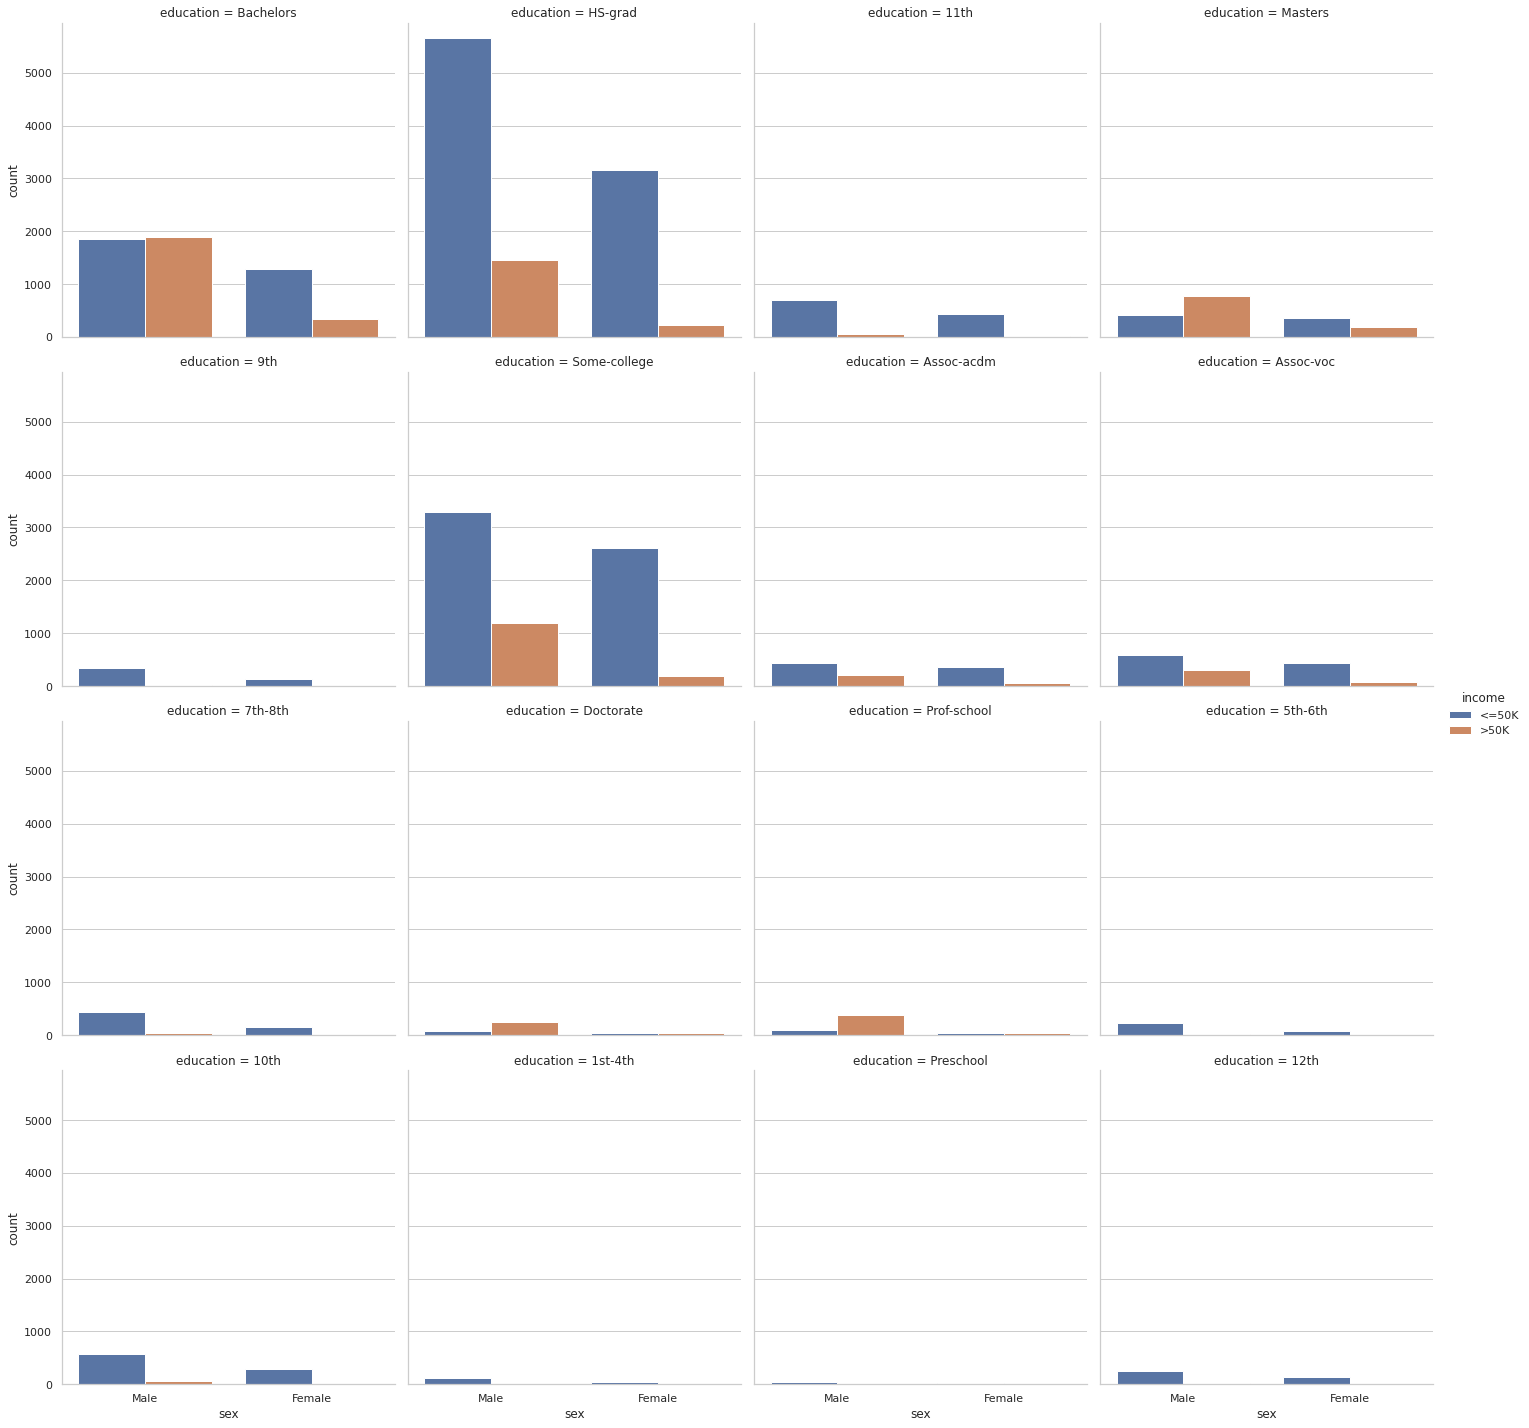

In [16]:
sns.set(style="whitegrid", color_codes=True)
sns.factorplot("sex", col='education', data=data, hue='income', kind="count", col_wrap=4);

**Taking a look at the above graphs , I can see that each feature has a different range of distribution. Thus, using scaling before our predictions should be of great use. Also, the categorical features do stand out.**

In [17]:
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

In [18]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1)) #add 1

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

# Show an example of a record with scaling applied
display(features_raw.head(5))

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba


**ONEHOTENCODER**

In [20]:
#Creating dummies
features = pd.get_dummies(features_raw)


from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder1 = LabelEncoder()
data['income'] = labelencoder1.fit_transform(data['income'])
labelencoder2 = LabelEncoder()
data['sex'] = labelencoder2.fit_transform(data['sex'])
labelencoder3 = LabelEncoder()
data['race'] = labelencoder3.fit_transform(data['race'])

data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,4,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,4,1,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,4,1,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,2,1,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,2,0,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,4,0,0,0,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,4,1,0,0,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,4,0,0,0,40,United-States,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,4,1,0,0,20,United-States,0


**To split the available dataset for testing and training, I'll use the train_test_split method**

In [21]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    income_raw,
                                                    test_size = 0.2,
                                                    random_state = 0)

# Showing the results of the split
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

26048
6513
26048
6513


# **Machine Learning**

**Next, I'll import all the Machine Learning algorithms I will be using.**

# 1.**LogisticRegression**

In [34]:
from sklearn.linear_model import LogisticRegression
logrs=LogisticRegression()

In [35]:
logrs.fit(X_train,y_train) #train

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Predicting on Train data**

In [36]:
y_train_pred=logrs.predict(X_train)

In [37]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_train,y_train_pred)

array([[18459,  1343],
       [ 2505,  3741]])

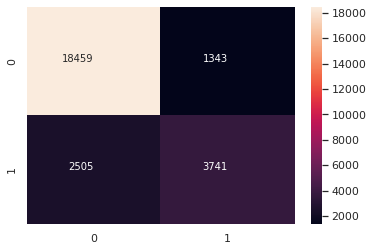

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_train, y_train_pred)
conf
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})

In [26]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91     19802
        >50K       0.74      0.60      0.66      6246

    accuracy                           0.85     26048
   macro avg       0.81      0.77      0.78     26048
weighted avg       0.85      0.85      0.85     26048



In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.8522727272727273

**Predicting on Test data**

In [28]:
logrs.fit(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_test_pred = logrs.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_test_pred)

array([[4582,  336],
       [ 665,  930]])

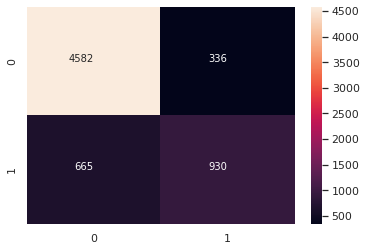

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_test, y_test_pred)
conf
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})

In [40]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      4918
        >50K       0.73      0.58      0.65      1595

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513



In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.846307385229541

# 2.**Randomforest classifier**

In [42]:
#import,inttialize and fit
#import the RFC From sklearn
from sklearn.ensemble import RandomForestClassifier

#intialize the object for RFC
rfc = RandomForestClassifier(n_estimators = 40)

#fit RFC to the dataset
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**Predicting on Train data**

In [43]:
#predict on training data
#syntax:objectname.predict(Inputvalues)
y_pred_train = rfc.predict(X_train)

from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

       <=50K       0.98      0.99      0.99     19802
        >50K       0.96      0.94      0.95      6246

    accuracy                           0.98     26048
   macro avg       0.97      0.97      0.97     26048
weighted avg       0.98      0.98      0.98     26048



In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred_train)

0.9779253685503686

**Predicting on Test data**

In [45]:
#predicition on test data(unseen data)
y_pred_test = rfc.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       <=50K       0.88      0.91      0.90      4918
        >50K       0.70      0.62      0.66      1595

    accuracy                           0.84      6513
   macro avg       0.79      0.77      0.78      6513
weighted avg       0.84      0.84      0.84      6513



In [46]:
accuracy_score(y_test,y_pred_test)

0.8415476738830032

# **3.Naive Bayes Classifier**

In [47]:
# Apply the naive Bayes Algorithm
# Import BernNB
from sklearn.naive_bayes import BernoulliNB
# creating an object for BerNB
model_BernNB = BernoulliNB()

In [48]:
# Applying the algorithm to the data
# objectName.fit(Input,Output)
model_BernNB.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

**Predicting on Train data**

In [49]:
y_train_pred = model_BernNB.predict(X_train)

In [50]:
# compare the actual values(y_test) with predicted values(y_test_pred)
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_train,y_train_pred)

array([[14826,  4976],
       [ 1297,  4949]])

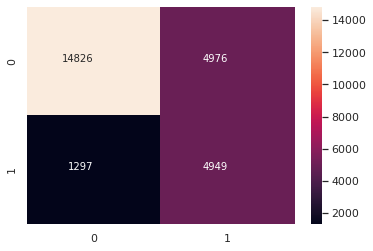

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_train, y_train_pred)
conf
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})

In [53]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

       <=50K       0.92      0.75      0.83     19802
        >50K       0.50      0.79      0.61      6246

    accuracy                           0.76     26048
   macro avg       0.71      0.77      0.72     26048
weighted avg       0.82      0.76      0.77     26048



In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.7591753685503686

**Predicting on Test data**

In [55]:
# Applying the algorithm to the data
# objectName.fit(Input,Output)
model_BernNB.fit(X_test, y_test)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [56]:
y_test_pred = model_BernNB.predict(X_test)

In [57]:
# compare the actual values(y_test) with predicted values(y_test_pred)
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_test_pred)

array([[3692, 1226],
       [ 350, 1245]])

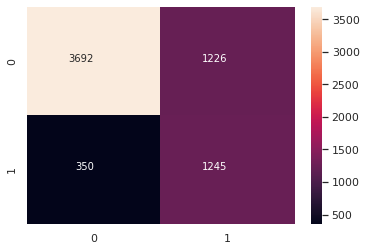

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_test, y_test_pred)
conf
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})

In [59]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

       <=50K       0.91      0.75      0.82      4918
        >50K       0.50      0.78      0.61      1595

    accuracy                           0.76      6513
   macro avg       0.71      0.77      0.72      6513
weighted avg       0.81      0.76      0.77      6513



In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.7580224167050514

# **Conclusion:**

Comparing the three models we can clearly say that randomforest classifier performed well with an accuracy of around 79-97% compared to others algorithms
